# Regression Models Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Project6_data.csv')
data.head()

,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [3]:
data.columns

Index(['Unnamed: 0', 'Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'Latitude', 'Longitude', 'State Name',
       'Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state'],
      dtype='object')

In [4]:
data.describe()

,Unnamed: 0,Rating,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
count,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,3.078500e+04,30785.000000,30785.000000,30785.000000
mean,15392.000000,3.527075,20.986716,77.624482,13383.178796,-91.940324,3937.800252,-87.654863,9.340490e+07,74.513815,1222.318883,221781.967549
std,8887.008355,1.480751,4.904788,4.897669,9652.418551,189.709705,2022.009990,7.696626,4.112688e+07,12.449141,463.221742,93044.821822
min,0.000000,1.000000,8.255166,69.017391,0.000000,-8407.000000,220.940000,-103.200000,2.535146e+07,10.980000,143.000000,38863.000000
25%,7696.000000,2.000000,18.547627,73.739626,5191.980000,-92.580000,2680.020000,-93.000000,6.113070e+07,70.600000,998.000000,130060.000000
50%,15392.000000,4.000000,20.303444,76.945477,10804.560000,-86.800000,4130.460000,-86.920000,9.127612e+07,76.680000,1248.000000,243286.000000
75%,23088.000000,5.000000,25.263877,80.197102,20707.870000,-84.740000,5107.230000,-84.949000,1.123743e+08,82.340000,1455.500000,307713.000000
max,30784.000000,5.000000,32.427797,95.619158,32444.069600,-63.000000,12220.910000,76.930000,1.998123e+08,94.000000,3055.000000,342239.000000


In [5]:
data.shape

(30785, 17)

In [3]:
data.drop('Unnamed: 0', axis=1, inplace = True)
data.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


### Missing Values Imputation 

In [123]:
data.isnull().sum()

Operator                            0
In Out Travelling                   0
Network Type                        0
Rating                              0
Call Drop Category                  0
Latitude                            0
Longitude                           0
State Name                          0
Average Data Speed Download         0
Average Signal Strength Download    0
Average Data Speed Upload           0
Average Signal Strength Upload      0
Population                          0
Literacy Rate                       0
Rainfall                            0
Area of the state                   0
dtype: int64

Note: There are no missing values present in the data, but if there are some missing values, we try to fill them by statistical methods (median, mean) for continuous variables and by mode for categorical variables. We can also take reference of some another related feature and can fill the missing values.

### Handling Outliers 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Operator                          30785 non-null  object 
 1   In Out Travelling                 30785 non-null  object 
 2   Network Type                      30785 non-null  object 
 3   Rating                            30785 non-null  int64  
 4   Call Drop Category                30785 non-null  object 
 5   Latitude                          30785 non-null  float64
 6   Longitude                         30785 non-null  float64
 7   State Name                        30785 non-null  object 
 8   Average Data Speed Download       30785 non-null  float64
 9   Average Signal Strength Download  30785 non-null  float64
 10  Average Data Speed Upload         30785 non-null  float64
 11  Average Signal Strength Upload    30785 non-null  float64
 12  Popu

In [4]:
print(data['Latitude'].max())
print(data['Latitude'].quantile(0.95))

32.42779667
28.618921719999996


In [5]:
max_threshold = data['Latitude'].quantile(0.95)
data[data['Latitude'] > max_threshold].shape

(1540, 16)

In [6]:
min_threshold = data['Latitude'].quantile(0.05)
print(data['Latitude'].min())
print(min_threshold)

8.25516609
12.898128592


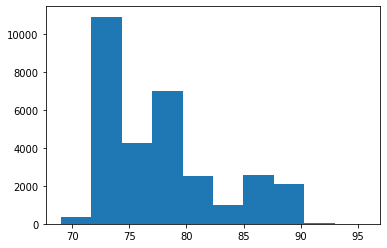

In [7]:
plt.hist(data['Longitude'])
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Latitude'>

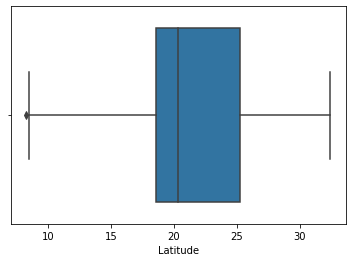

In [8]:
sns.boxplot(data['Latitude'])

In [9]:
data[data['Latitude'] < min_threshold].shape

(1540, 16)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longitude'>

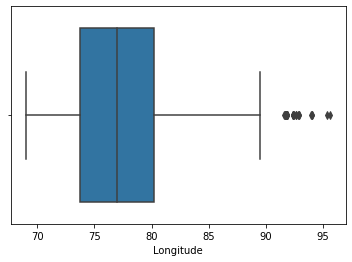

In [10]:
sns.boxplot(data['Longitude'])

In [11]:
print(data['Longitude'].max())
print(data['Longitude'].quantile(0.90))

95.61915753
85.819443056


In [12]:
max_threshold = data['Longitude'].quantile(0.95)
data[data['Longitude'] > max_threshold].shape

(1540, 16)

In [13]:
data['Average Data Speed Download'].max()

32444.0696

In [14]:
data['Average Data Speed Download'].quantile(0.95)

31730.53

In [15]:
data['Average Data Speed Download'].min()

0.0

In [16]:
data['Average Data Speed Download'].quantile(0.05)

1742.47

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Data Speed Download'>

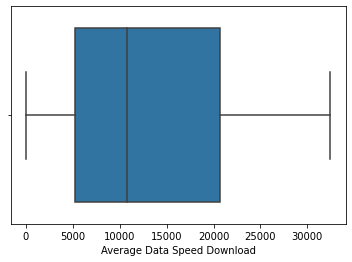

In [17]:
sns.boxplot(data['Average Data Speed Download'])

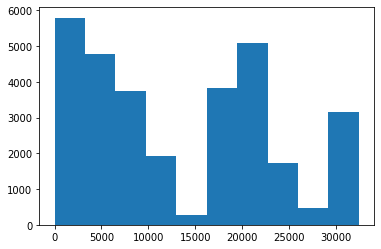

In [18]:
plt.hist(data['Average Data Speed Download'])
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Signal Strength Download'>

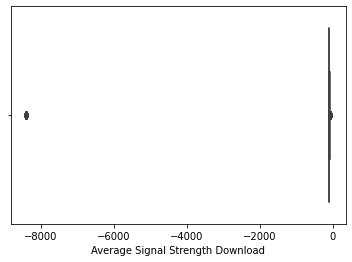

In [19]:
sns.boxplot(data['Average Signal Strength Download'])

In [20]:
data['Average Data Speed Upload'].min()

220.94

In [21]:
min_thres = data['Average Data Speed Upload'].quantile(0.05)
min_thres

862.2004

In [22]:
data['Average Data Speed Upload'].max()

12220.91

In [23]:
max_thres = data['Average Data Speed Upload'].quantile(0.98)
max_thres

9720.68

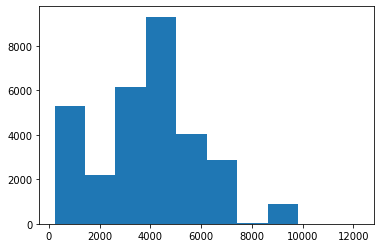

In [24]:
plt.hist(data['Average Data Speed Upload'])
plt.show()

In [25]:
# This is a 3G network type but the avg data upload speed is maximum and it is only a single entry > 98 precentile threshold.
index = data[data['Average Data Speed Upload'] > max_thres ].index
data.drop(index , axis = 0, inplace = True)
data.shape

(30784, 16)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Data Speed Upload'>

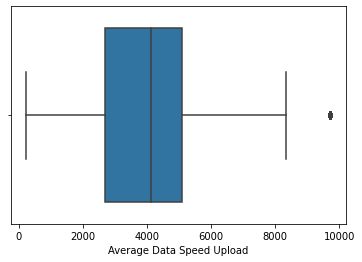

In [26]:
sns.boxplot(data['Average Data Speed Upload'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Signal Strength Upload'>

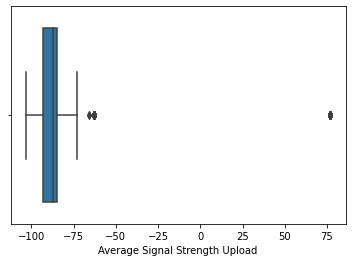

In [27]:
sns.boxplot(data['Average Signal Strength Upload'])

In [28]:
data['Average Signal Strength Upload'].max()

76.93

In [29]:
max_thres = data['Average Signal Strength Upload'].quantile(0.999)
max_thres

-63.0

In [30]:
# The avg signal strength upload feature values are all in negative, except the value 76.93. It is either mis-written or wrong. 
data[data['Average Signal Strength Upload'] > max_thres ] 

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
320,BSNL,Outdoor,3G,1,Poor Voice Quality,11.333950,77.703832,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
943,BSNL,Indoor,3G,1,Poor Voice Quality,11.333950,77.703832,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
944,BSNL,Indoor,3G,1,Poor Voice Quality,11.333950,77.703832,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
2813,BSNL,Indoor,3G,1,Poor Voice Quality,11.331888,77.706396,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
3161,BSNL,Indoor,3G,5,Satisfactory,12.970213,80.187106,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
4675,BSNL,Outdoor,3G,1,Poor Voice Quality,11.335138,77.707814,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
5639,BSNL,Outdoor,3G,1,Poor Voice Quality,11.332389,77.701745,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
5640,BSNL,Outdoor,3G,1,Poor Voice Quality,11.332770,77.701888,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
6724,BSNL,Outdoor,3G,1,Poor Voice Quality,11.331618,77.699956,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0
9404,BSNL,Indoor,3G,5,Satisfactory,13.041008,80.197457,Tamil Nadu,2786.96,-76.71,1570.96,76.93,72147030.0,80.33,998.0,130060.0


In [31]:
index1 = data[data['Average Signal Strength Upload'] > max_thres ].index
data.drop(index1, axis = 0, inplace = True)
data.shape

(30754, 16)

In [32]:
data['Operator'].value_counts()

RJio        15218
Airtel       6982
Vodafone     5895
Idea         2050
BSNL          609
Name: Operator, dtype: int64

In [33]:
data['State Name'].value_counts()

Maharashtra       10422
Gujarat            2671
Uttar Pradesh      2531
West Bengal        2384
Tamil Nadu         2168
Rajasthan          2164
Karnataka          1967
Odisha             1646
Bihar              1404
Haryana            1304
Madhya Pradesh      872
Andhra Pradesh      809
Punjab              255
Kerala               97
Assam                60
Name: State Name, dtype: int64

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Literacy Rate'>

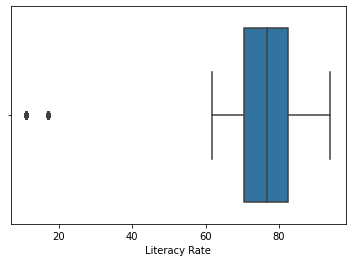

In [34]:
sns.boxplot(data['Literacy Rate'])

In [35]:
data['Literacy Rate'].min()

10.98

In [36]:
min_thres = data['Literacy Rate'].quantile(0.03)
min_thres

61.8

In [37]:
data[data['Literacy Rate'] < min_thres]

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
15,RJio,Outdoor,4G,3,Satisfactory,16.977043,82.238104,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
33,RJio,Indoor,4G,3,Satisfactory,16.510005,80.666504,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
34,RJio,Indoor,4G,3,Satisfactory,16.521923,80.629653,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
35,RJio,Indoor,4G,3,Satisfactory,16.521923,80.629653,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
36,RJio,Indoor,4G,3,Satisfactory,16.521854,80.630070,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30660,RJio,Indoor,4G,2,Poor Voice Quality,13.541779,78.513418,Andhra Pradesh,32444.069600,-81.241925,5755.952023,-81.279064,84580777.0,10.98,1245.0,160205.0
30730,Airtel,Travelling,4G,2,Poor Voice Quality,16.413405,80.297109,Andhra Pradesh,14077.240000,-96.520000,6320.060000,-96.470000,84580777.0,10.98,1245.0,160205.0
30731,Airtel,Indoor,3G,2,Poor Voice Quality,16.413405,80.297109,Andhra Pradesh,1504.372816,-83.767490,785.364486,-83.677932,84580777.0,10.98,1245.0,160205.0
30732,Airtel,Travelling,4G,2,Poor Voice Quality,16.413405,80.297109,Andhra Pradesh,14077.240000,-96.520000,6320.060000,-96.470000,84580777.0,10.98,1245.0,160205.0


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

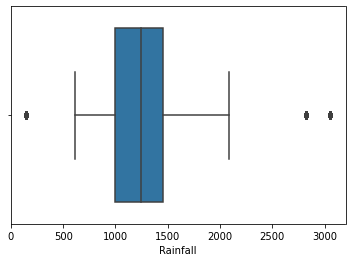

In [38]:
sns.boxplot(data['Rainfall'])

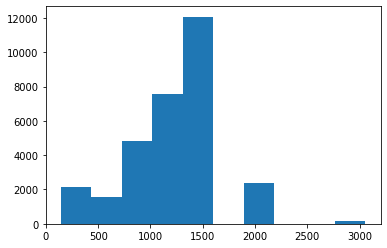

In [39]:
plt.hist(data['Rainfall'])
plt.show()

In [40]:
data['Rainfall'].quantile(0.95)

2089.0

In [41]:
data['Rainfall'].max()

3055.0

In [42]:
data[data['Rainfall'] > data['Rainfall'].quantile(0.95)]

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
256,BSNL,Indoor,3G,2,Poor Voice Quality,12.046909,75.524134,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
257,BSNL,Indoor,3G,2,Poor Voice Quality,12.046909,75.524134,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
1110,BSNL,Indoor,3G,2,Poor Voice Quality,12.047074,75.523883,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
1111,BSNL,Outdoor,3G,2,Poor Voice Quality,12.047074,75.523883,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
1660,BSNL,Outdoor,3G,5,Satisfactory,9.226201,76.713040,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29031,RJio,Indoor,4G,1,Call Dropped,26.118807,91.808719,Assam,5653.491841,-96.206349,2864.4733,-96.233158,31205576.0,17.07,2818.0,78438.0
29799,BSNL,Indoor,3G,2,Poor Voice Quality,12.050190,75.523829,Kerala,2283.370000,-86.330000,1120.4200,-86.490000,33387677.0,94.00,3055.0,38863.0
29843,RJio,Indoor,4G,3,Poor Voice Quality,24.807109,92.612779,Assam,5653.491841,-96.206349,2864.4733,-96.233158,31205576.0,17.07,2818.0,78438.0
29844,RJio,Indoor,4G,3,Poor Voice Quality,24.807109,92.612779,Assam,5653.491841,-96.206349,2864.4733,-96.233158,31205576.0,17.07,2818.0,78438.0


In [43]:
index2 = data[data['Rainfall'] > data['Rainfall'].quantile(0.95)].index
data.drop(index2, axis = 0, inplace = True)
data.shape

(30597, 16)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

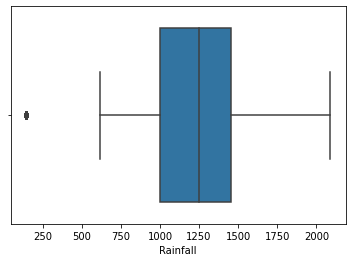

In [44]:
sns.boxplot(data['Rainfall'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area of the state'>

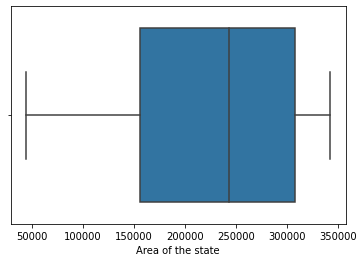

In [45]:
sns.boxplot(data['Area of the state'])

### Label encoding for categorical features 

In [46]:
data.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [47]:
print(data['Operator'].unique())
print(data['In Out Travelling'].unique())
print(data['Network Type'].unique())
print(data['Call Drop Category'].unique())

['Airtel' 'Vodafone' 'RJio' 'BSNL' 'Idea']
['Indoor' 'Travelling' 'Outdoor']
['4G' '3G']
['Satisfactory' 'Call Dropped' 'Poor Voice Quality']


In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encoding the columns
data.iloc[:,0] = labelencoder.fit_transform(data.iloc[:,0].values)

data.iloc[:,1] = labelencoder.fit_transform(data.iloc[:,1].values)

data.iloc[:,2] = labelencoder.fit_transform(data.iloc[:,2].values)

data.iloc[:,4] = labelencoder.fit_transform(data.iloc[:,4].values)

In [49]:
print(data['Operator'].unique())
print(data['In Out Travelling'].unique())
print(data['Network Type'].unique())
print(data['Call Drop Category'].unique())

[0 4 3 1 2]
[0 2 1]
[1 0]
[2 0 1]


In [118]:
data1 = data.drop('State Name', axis = 1)
data1.head()

AttributeError: 'MinMaxScaler' object has no attribute 'drop'

### Correlation matrix 

<AxesSubplot:>

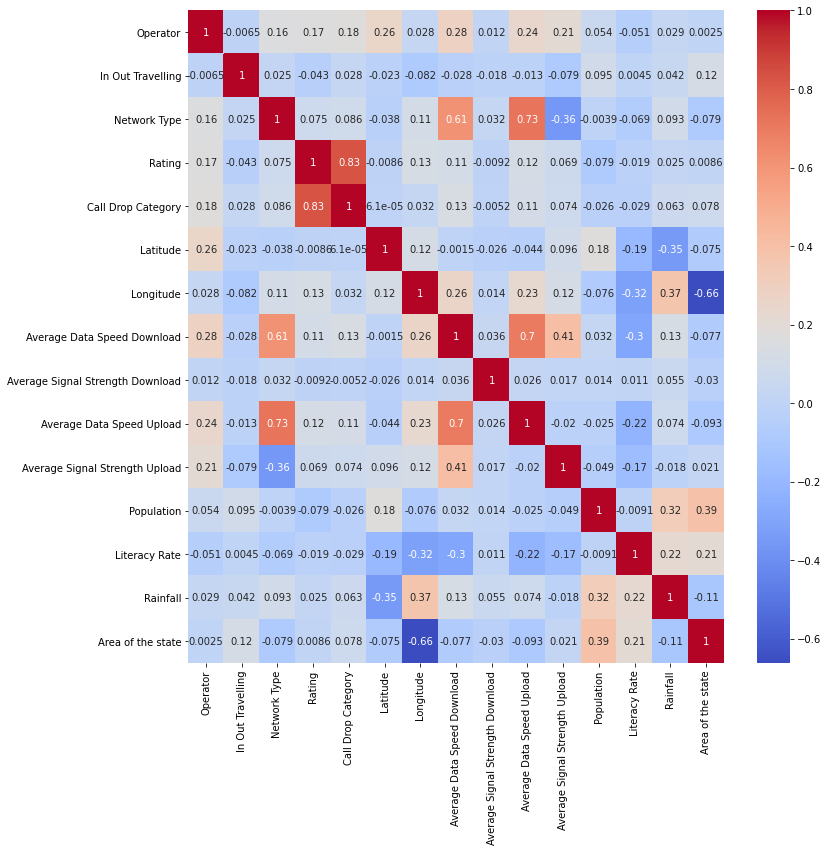

In [51]:
plt.figure(figsize = (12,12))
sns.heatmap(data1.corr(), annot = True, cmap="coolwarm")

## Regression model to predict Avg data speed download 

In [52]:
X = data1.drop('Average Data Speed Download', axis = 1)
y = data1['Average Data Speed Download']

In [53]:
# Split the dataset for training (80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [54]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
# Create a function with many machine learning models
def models(X_train, y_train):
    
    # Use linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    
    # Use linear Lasso Regression
    from sklearn.linear_model import Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)    
    
    # Use SVR (linear kernel)
    from sklearn.svm import SVR
    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(X_train, y_train)
    
    # Use SVR (RBF kernel)
    from sklearn.svm import SVR
    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(X_train, y_train)
        
    # Use Decision Tree
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    
    # Use the Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators = 100, criterion='mse')
    forest.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print("[0]Linear Regression Training Accuracy: ", lin.score(X_train, y_train))
    print("[1]Lasso Regression Training Accuracy: ", lasso.score(X_train, y_train))
    print("[2]SVR linear Training Accuracy: ", svr_lin.score(X_train, y_train))
    print("[3]SVR RBF Training Accuracy: ", svr_rbf.score(X_train, y_train))
    print("[4]Decision Tree Training Accuracy: ", tree.score(X_train, y_train))
    print("[5]Random Forest Training Accuracy: ", forest.score(X_train, y_train))

    return lin, lasso, svr_lin, svr_rbf, tree, forest

In [56]:
# Get and train all of the models
model = models(X_train, y_train)

[0]Linear Regression Training Accuracy:  0.8679101245283342
[1]Lasso Regression Training Accuracy:  0.8679098490153219
[2]SVR linear Training Accuracy:  0.8413111556210463
[3]SVR RBF Training Accuracy:  0.1080226635121948
[4]Decision Tree Training Accuracy:  1.0
[5]Random Forest Training Accuracy:  0.9999976275336584


In [58]:
# print the prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(6):
    y_pred = model[i].predict(X_test)
    print(" Model" + str([i])+" MSE:  "  , mean_squared_error(y_test, y_pred, squared=False))
    print(" Model" + str([i])+" R2 Value:  ", r2_score(y_test, y_pred) )
    print("\n")

 Model[0] MSE:   3505.5720101273187
 Model[0] R2 Value:   0.8701345823275982


 Model[1] MSE:   3505.651690416859
 Model[1] R2 Value:   0.870128678679548


 Model[2] MSE:   3859.819238997013
 Model[2] R2 Value:   0.8425619636650576


 Model[3] MSE:   9206.06702372279
 Model[3] R2 Value:   0.10437956088401534


 Model[4] MSE:   430.4194024325818
 Model[4] R2 Value:   0.9980422401767631


 Model[5] MSE:   454.3074325243809
 Model[5] R2 Value:   0.9978189008158839




### Feature Importances and feature selection

In [61]:
# Get feature importance
forest = model[5]
importances = pd.DataFrame({'Feature': X.iloc[:,:].columns,'importance': np.round(forest.feature_importances_ , 3)})
importances = importances.sort_values('importance', ascending = False).set_index('Feature')
importances

,importance
Feature,
Average Data Speed Upload,0.653
Average Signal Strength Upload,0.305
Network Type,0.017
Operator,0.010
Latitude,0.004
Area of the state,0.004
Population,0.002
Rainfall,0.002
Average Signal Strength Download,0.001


<AxesSubplot:xlabel='Feature'>

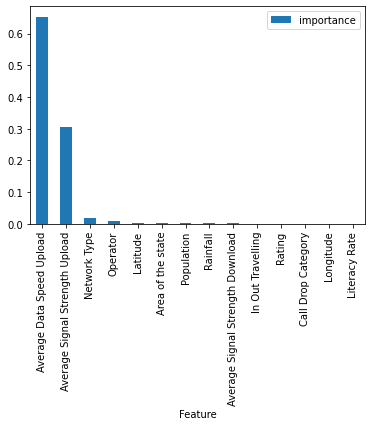

In [62]:
# Visualize the importance
importances.plot.bar()

In [63]:
data2 = data1.drop(['Rating',
       'Call Drop Category','Population', 'Literacy Rate', 'Rainfall', 'Area of the state','Call Drop Category','Average Signal Strength Download','In Out Travelling','Average Data Speed Download'], axis = 1)
data2.head()

,Operator,Network Type,Latitude,Longitude,Average Data Speed Upload,Average Signal Strength Upload
0,0,1,12.998502,77.672437,2591.08,-94.840
1,4,1,23.554190,72.620110,4671.48,-91.920
2,0,0,11.327329,76.749743,968.58,-85.470
3,0,1,22.279660,73.149369,2515.34,-89.515
4,0,1,18.546344,73.819090,4968.27,-94.110


### Final Random forest regressor model based on feature selection 

In [66]:
X = data2
y = data1['Average Data Speed Download']

In [67]:
# Split the dataset for training (80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [98]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# Use the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, criterion='mse')
forest.fit(X_train, y_train)

# Get and train all of the models
forest.score(X_train, y_train)

0.9999978444004907

In [70]:
## Testing Accuracy for the model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)
print("Random Forest Regressor testing Accuracy (MSE):  "  , mean_squared_error(y_test, y_pred, squared=False))
print("Random Forest Regressor testing Accuracy (R2 Score):  "  , r2_score(y_test, y_pred))

Random Forest Regressor testing Accuracy (MSE):   302.7341238409936
Random Forest Regressor testing Accuracy (R2 Score):   0.9990315025421401


In [71]:
# Feature Importances
importances = pd.DataFrame({'Feature': X.iloc[:,:].columns,'importance': np.round(forest.feature_importances_ , 3)})
importances = importances.sort_values('importance', ascending = False).set_index('Feature')
importances

,importance
Feature,
Average Data Speed Upload,0.662
Average Signal Strength Upload,0.306
Network Type,0.015
Operator,0.010
Latitude,0.005
Longitude,0.002


<AxesSubplot:xlabel='Feature'>

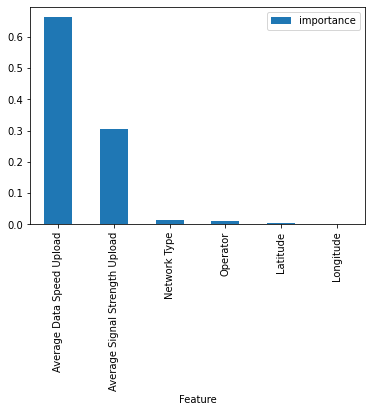

In [72]:
# Visualize the importance
importances.plot.bar()

In [73]:
operator = int(input("Enter operator:  "))
network = int(input("3G or 4G: "))
latitude= float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
avg_upload = float(input("Enter Avg data speed Upload: "))
avg_signal = float(input("Enter Signal Upload strength:  "))

my_value = [[operator,network,latitude,longitude,avg_upload,avg_signal]]

# print prediction using model[ Check model_number]
pred = forest.predict(my_value)
print(pred)


Enter operator:  0
3G or 4G: 1
Enter latitude: 12.68
Enter longitude: 73.84
Enter Avg data speed Upload: 4724
Enter Signal Upload strength:  -78.6
[16950.36]
